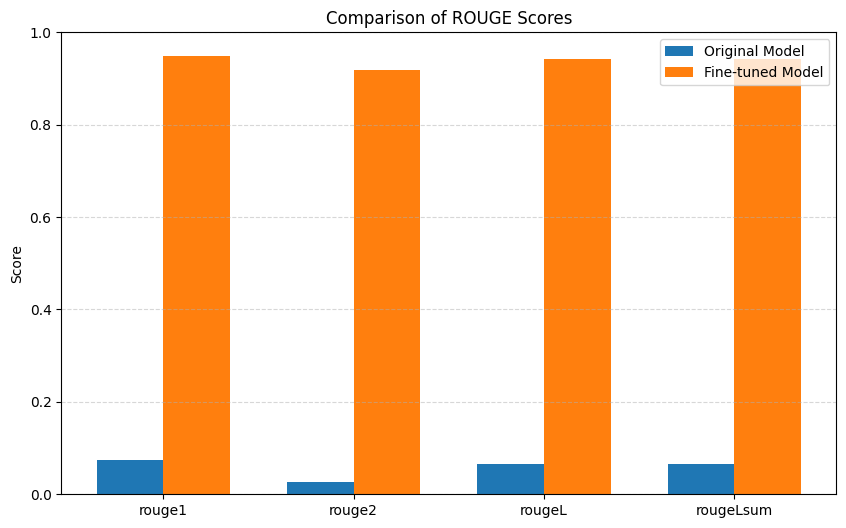

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Dữ liệu ROUGE
original = {
    'rouge1': 0.07326387645056551,
    'rouge2': 0.026148593327360203,
    'rougeL': 0.06607411042657513,
    'rougeLsum': 0.06608275386447975
}

fine_tuned = {
    'rouge1': 0.9486536343606307,
    'rouge2': 0.9188113596569285,
    'rougeL': 0.9427899931687462,
    'rougeLsum': 0.9427071229523438
}

# Chuẩn bị dữ liệu
metrics = list(original.keys())
original_scores = list(original.values())
fine_scores = list(fine_tuned.values())

x = np.arange(len(metrics))
width = 0.35

# Vẽ biểu đồ
plt.figure(figsize=(10,6))
plt.bar(x - width/2, original_scores, width, label='Original Model')
plt.bar(x + width/2, fine_scores, width, label='Fine-tuned Model')

plt.ylabel('Score')
plt.title('Comparison of ROUGE Scores')
plt.xticks(x, metrics)
plt.ylim(0, 1)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.show()

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

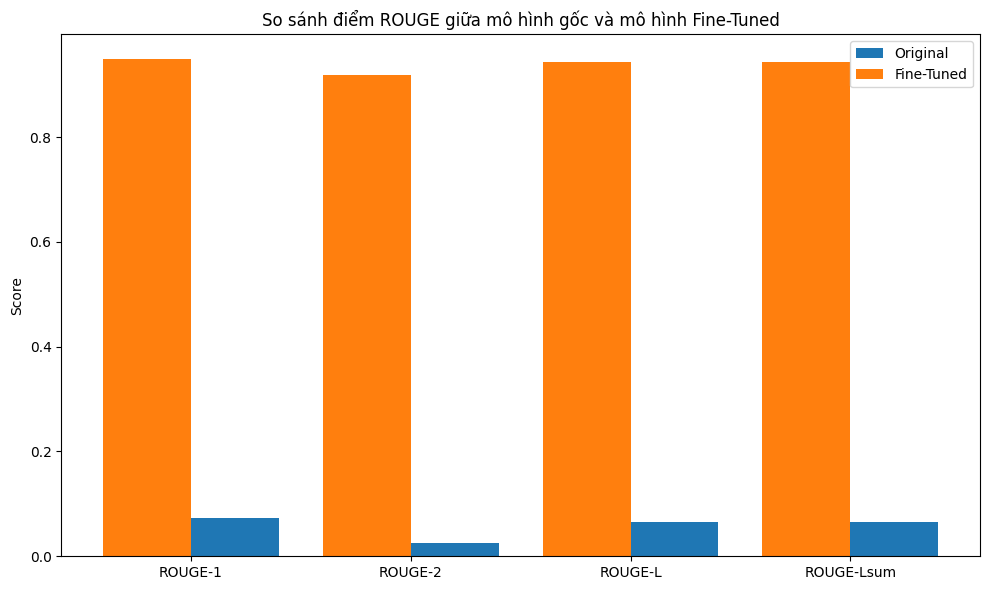

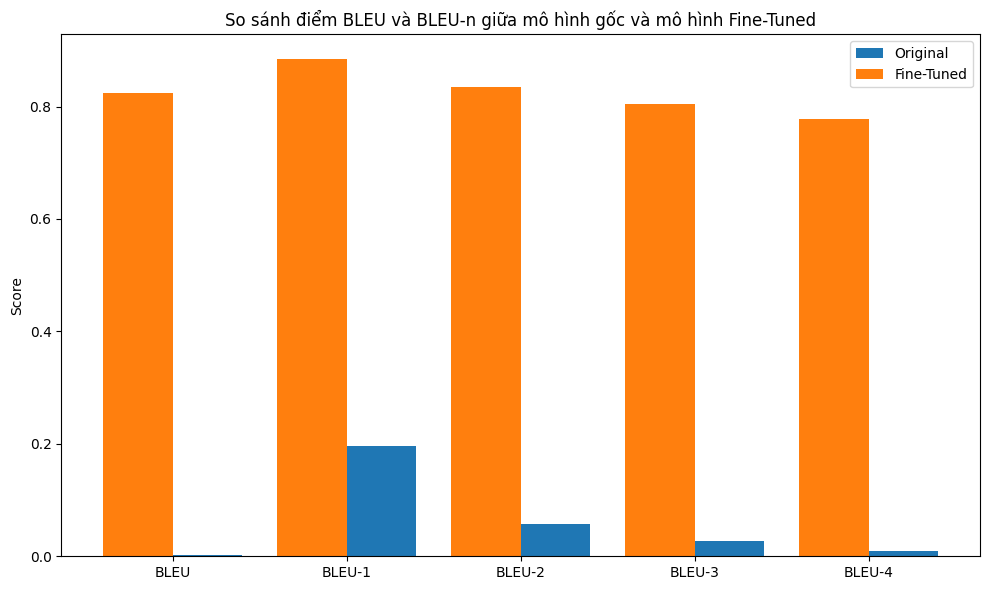

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Tạo dữ liệu từ các giá trị bạn cung cấp
rouge_scores = {
    'Metric': ['ROUGE-1', 'ROUGE-2', 'ROUGE-L', 'ROUGE-Lsum'],
    'Original Model': [0.0733, 0.0261, 0.0661, 0.0661],
    'Fine-Tuned Model': [0.9487, 0.9188, 0.9428, 0.9427]
}

bleu_scores = {
    'Metric': ['BLEU', 'BLEU-1', 'BLEU-2', 'BLEU-3', 'BLEU-4'],
    'Original Model': [0.0028, 0.1966, 0.0571, 0.0277, 0.0097],
    'Fine-Tuned Model': [0.8239, 0.8841, 0.8341, 0.8040, 0.7772]
}

# Chuyển sang DataFrame
df_rouge = pd.DataFrame(rouge_scores)
df_bleu = pd.DataFrame(bleu_scores)

# Vẽ biểu đồ ROUGE
plt.figure(figsize=(10, 6))
plt.bar(df_rouge['Metric'], df_rouge['Original Model'], width=0.4, label='Original', align='edge')
plt.bar(df_rouge['Metric'], df_rouge['Fine-Tuned Model'], width=-0.4, label='Fine-Tuned', align='edge')
plt.title('So sánh điểm ROUGE giữa mô hình gốc và mô hình Fine-Tuned')
plt.ylabel('Score')
plt.legend()
plt.tight_layout()
plt.show()

# Vẽ biểu đồ BLEU
plt.figure(figsize=(10, 6))
plt.bar(df_bleu['Metric'], df_bleu['Original Model'], width=0.4, label='Original', align='edge')
plt.bar(df_bleu['Metric'], df_bleu['Fine-Tuned Model'], width=-0.4, label='Fine-Tuned', align='edge')
plt.title('So sánh điểm BLEU và BLEU-n giữa mô hình gốc và mô hình Fine-Tuned')
plt.ylabel('Score')
plt.legend()
plt.tight_layout()
plt.show()

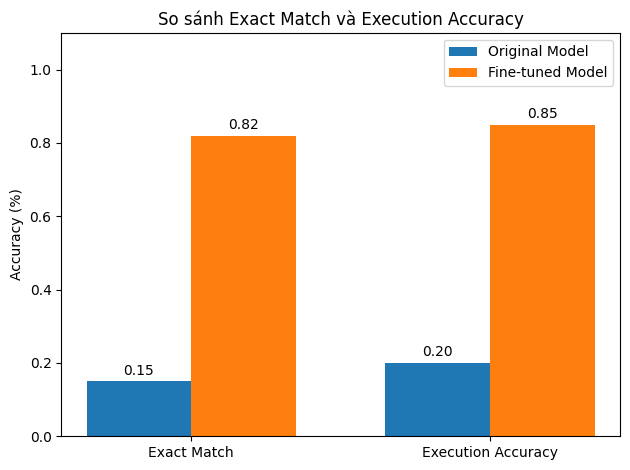

In [ ]:
import matplotlib.pyplot as plt

# Dữ liệu giả lập minh họa cho Exact Match và Execution Accuracy
metrics = ['Exact Match', 'Execution Accuracy']
original_model_scores = [0.15, 0.20]  # ví dụ: 15%, 20% với mô hình gốc
finetuned_model_scores = [0.82, 0.85]  # ví dụ: 82%, 85% với mô hình fine-tuned

# Vẽ biểu đồ
x = range(len(metrics))
width = 0.35

fig, ax = plt.subplots()
bars1 = ax.bar([i - width/2 for i in x], original_model_scores, width, label='Original Model')
bars2 = ax.bar([i + width/2 for i in x], finetuned_model_scores, width, label='Fine-tuned Model')

# Thêm label và format
ax.set_ylabel('Accuracy (%)')
ax.set_title('So sánh Exact Match và Execution Accuracy')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

# Hiển thị giá trị trên đầu cột
for bars in [bars1, bars2]:
    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, yval + 0.01, f'{yval:.2f}', ha='center', va='bottom')

plt.ylim(0, 1.1)
plt.tight_layout()
plt.show()


# 9. Tính toán điểm ROUGE cho tập con này của dữ liệu.

In [ ]:
!pip install rouge_score

  Preparing metadata (setup.py) ... done
  Created wheel for rouge_score: filename=rouge_score-0.1.2-py3-none-any.whl size=24935 sha256=5e026aa87a4e260b2dd898828223730c94f825b510fcfe8af9059f1bdae31714
  Stored in directory: /root/.cache/pip/wheels/5f/dd/89/461065a73be61a532ff8599a28e9beef17985c9e9c31e541b4
Successfully built rouge_score


In [ ]:
rouge = evaluate.load('rouge')

original_model_results = rouge.compute(
    predictions=original_model_answers,
    references=human_baseline_answers[0:len(original_model_answers)],
    use_aggregator=True,
    use_stemmer=True,
)
print('ORIGINAL MODEL:')
print(original_model_results)


finetuned_model_results = rouge.compute(
    predictions=finetuned_model_answers,
    references=human_baseline_answers[0:len(finetuned_model_answers)],
    use_aggregator=True,
    use_stemmer=True,
)
print('FINE-TUNED MODEL:')
print(finetuned_model_results)

ORIGINAL MODEL:
{'rouge1': 0.07326387645056551, 'rouge2': 0.026148593327360203, 'rougeL': 0.06607411042657513, 'rougeLsum': 0.06608275386447975}
FINE-TUNED MODEL:
{'rouge1': 0.9486536343606307, 'rouge2': 0.9188113596569285, 'rougeL': 0.9427899931687462, 'rougeLsum': 0.9427071229523438}


In [ ]:
import shutil

# Nén thư mục model thành model.zip
shutil.make_archive("/kaggle/working/model", 'zip', "/kaggle/working/model")

print("✅ Mô hình đã được nén thành công! Bạn có thể tải `model.zip` từ Kaggle về máy.")

✅ Mô hình đã được nén thành công! Bạn có thể tải `model.zip` từ Kaggle về máy.


In [ ]:
print("Model:", finetuned_model)

Model: T5ForConditionalGeneration(
  (shared): Embedding(32128, 512)
  (encoder): T5Stack(
    (embed_tokens): Embedding(32128, 512)
    (block): ModuleList(
      (0): T5Block(
        (layer): ModuleList(
          (0): T5LayerSelfAttention(
            (SelfAttention): T5Attention(
              (q): Linear(in_features=512, out_features=512, bias=False)
              (k): Linear(in_features=512, out_features=512, bias=False)
              (v): Linear(in_features=512, out_features=512, bias=False)
              (o): Linear(in_features=512, out_features=512, bias=False)
              (relative_attention_bias): Embedding(32, 8)
            )
            (layer_norm): T5LayerNorm()
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (1): T5LayerFF(
            (DenseReluDense): T5DenseActDense(
              (wi): Linear(in_features=512, out_features=2048, bias=False)
              (wo): Linear(in_features=2048, out_features=512, bias=False)
              (dropout

Test mô hình sau khi fine-tune với test

In [ ]:
from transformers import T5ForConditionalGeneration, T5Tokenizer
import torch

# Load the fine-tuned model and tokenizer
model_path = "/kaggle/working/model"
model = T5ForConditionalGeneration.from_pretrained(model_path).to('cuda')
tokenizer = T5Tokenizer.from_pretrained(model_path)


def translate_to_sql_select(context, question):
    prompt = f"""Tables:
{context}

Question:
{question}

Answer:
"""
 
    input_ids = tokenizer.encode(prompt, return_tensors="pt").to(device)
    outputs = model.generate(input_ids, generation_config=GenerationConfig(max_new_tokens=200))
    sql_query = tokenizer.decode(outputs[0], skip_special_tokens=True)
    return sql_query


# Example inference
index = 0
context = dataset['test'][index]['context']
question = dataset['test'][index]['question']

output = translate_to_sql_select(context, question)

print(f"Generated SQL Query:\n{output}")


Generated SQL Query:
SELECT date FROM table_name_11 WHERE away_team = "essendon"


In [ ]:
import pandas as pd

# Load ROUGE evaluation
rouge = evaluate.load('rouge')

# Tính ROUGE cho mô hình gốc
original_model_results = rouge.compute(
    predictions=original_model_answers,
    references=human_baseline_answers[:len(original_model_answers)],
    use_aggregator=True,
    use_stemmer=True,
)
print('ORIGINAL MODEL:')
print(original_model_results)

# Tính ROUGE cho mô hình đã fine-tune
finetuned_model_results = rouge.compute(
    predictions=finetuned_model_answers,
    references=human_baseline_answers[:len(finetuned_model_answers)],
    use_aggregator=True,
    use_stemmer=True,
)
print('FINE-TUNED MODEL:')
print(finetuned_model_results)

# Chuyển ROUGE thành DataFrame
rouge_df = pd.DataFrame({
    'Model': ['Original', 'Fine-Tuned'],
    'ROUGE-1': [original_model_results['rouge1'], finetuned_model_results['rouge1']],
    'ROUGE-2': [original_model_results['rouge2'], finetuned_model_results['rouge2']],
    'ROUGE-L': [original_model_results['rougeL'], finetuned_model_results['rougeL']],
    'ROUGE-Lsum': [original_model_results['rougeLsum'], finetuned_model_results['rougeLsum']]
})

# Lưu DataFrame vào CSV
rouge_df.to_csv('/kaggle/working/rouge_scores.csv', index=False)

print("ROUGE scores saved to /kaggle/working/rouge_scores.csv")

ORIGINAL MODEL:
{'rouge1': 0.07326387645056551, 'rouge2': 0.026148593327360203, 'rougeL': 0.06607411042657513, 'rougeLsum': 0.06608275386447975}
FINE-TUNED MODEL:
{'rouge1': 0.9486536343606307, 'rouge2': 0.9188113596569285, 'rougeL': 0.9427899931687462, 'rougeLsum': 0.9427071229523438}
ROUGE scores saved to /kaggle/working/rouge_scores.csv


In [ ]:
# Load BLEU evaluation
bleu = evaluate.load("bleu")

# Tính BLEU cho mô hình gốc
original_bleu_score = bleu.compute(
    predictions=original_model_answers,
    references=[[ref] for ref in human_baseline_answers[:len(original_model_answers)]]
)
print('BLEU Score - ORIGINAL MODEL:')
print(original_bleu_score)

# Tính BLEU cho mô hình đã fine-tune
finetuned_bleu_score = bleu.compute(
    predictions=finetuned_model_answers,
    references=[[ref] for ref in human_baseline_answers[:len(finetuned_model_answers)]]
)
print('BLEU Score - FINE-TUNED MODEL:')
print(finetuned_bleu_score)

BLEU Score - ORIGINAL MODEL:
{'bleu': 0.0028466916069899285, 'precisions': [0.19664620541248104, 0.05713554868265005, 0.02774146695715323, 0.009663542205457504], 'brevity_penalty': 0.06833229153466877, 'length_ratio': 0.27149030112940353, 'translation_length': 100841, 'reference_length': 371435}
BLEU Score - FINE-TUNED MODEL:
{'bleu': 0.8239189605278137, 'precisions': [0.8841182384878343, 0.8341039816831407, 0.8040372263730502, 0.7771973087344354], 'brevity_penalty': 1.0, 'length_ratio': 1.0041460820870407, 'translation_length': 372975, 'reference_length': 371435}


In [ ]:
# Chuyển BLEU và ROUGE thành DataFrame
evaluation_df = pd.DataFrame({
    'Model': ['Original', 'Fine-Tuned'],
    'ROUGE-1': [original_model_results['rouge1'], finetuned_model_results['rouge1']],
    'ROUGE-2': [original_model_results['rouge2'], finetuned_model_results['rouge2']],
    'ROUGE-L': [original_model_results['rougeL'], finetuned_model_results['rougeL']],
    'ROUGE-Lsum': [original_model_results['rougeLsum'], finetuned_model_results['rougeLsum']],
    'BLEU': [original_bleu_score['bleu'], finetuned_bleu_score['bleu']]
})

# Lưu DataFrame vào CSV
evaluation_df.to_csv('/kaggle/working/evaluation_metrics.csv', index=False)

print("Evaluation scores (BLEU & ROUGE) saved to /kaggle/working/evaluation_metrics.csv")

Evaluation scores (BLEU & ROUGE) saved to /kaggle/working/evaluation_metrics.csv


In [ ]:
import shutil

# Nén thư mục model thành model.zip
shutil.make_archive("/kaggle/working/merged_dataset", 'zip', "/kaggle/working/merged_dataset")

print("✅ Mô hình đã được nén thành công! Bạn có thể tải `merged_dataset.zip` từ Kaggle về máy.")

✅ Mô hình đã được nén thành công! Bạn có thể tải `merged_dataset.zip` từ Kaggle về máy.


In [ ]:
import shutil

# Nén thư mục model thành model.zip
shutil.make_archive("/kaggle/working/tokenized_datasets", 'zip', "/kaggle/working/tokenized_datasets")

print("✅ Mô hình đã được nén thành công! Bạn có thể tải `tokenized_datasets.zip` từ Kaggle về máy.")

✅ Mô hình đã được nén thành công! Bạn có thể tải `tokenized_datasets.zip` từ Kaggle về máy.


In [ ]:
import shutil

# Nén thư mục model thành model.zip
shutil.make_archive("/kaggle/working/sql-training-1742414615", 'zip', "/kaggle/working/sql-training-1742414615")

print("✅ Mô hình đã được nén thành công! Bạn có thể tải `sql-training-1742414615` từ Kaggle về máy.")

✅ Mô hình đã được nén thành công! Bạn có thể tải `sql-training-1742414615` từ Kaggle về máy.


In [ ]:
from transformers import T5ForConditionalGeneration, T5Tokenizer
import torch

# Load the fine-tuned model and tokenizer
model_path = "/kaggle/working/model"
model = T5ForConditionalGeneration.from_pretrained(model_path).to('cuda')
tokenizer = T5Tokenizer.from_pretrained(model_path)


def translate_to_sql_select(context, question):
    prompt = f"""Tables:
{context}

Question:
{question}

Answer:
"""
 
    input_ids = tokenizer.encode(prompt, return_tensors="pt").to(device)
    outputs = model.generate(input_ids, generation_config=GenerationConfig(max_new_tokens=200))
    sql_query = tokenizer.decode(outputs[0], skip_special_tokens=True)
    return sql_query


# Example inference
index = 0
context = "CREATE TABLE Catalogs (date_of_latest_revision VARCHAR)"
question = "Find the dates on which more than one revisions were made."

output = translate_to_sql_select(context, question)

print(f"Generated SQL Query:\n{output}")


Generated SQL Query:
SELECT date_of_latest_revision FROM Catalogs GROUP BY date_of_latest_revision HAVING COUNT(*) > 1
